In [1]:
import numpy as np
import matplotlib.pyplot as plt

Von neumann analysis of

$$
\frac{\partial y}{\partial t} = -a\frac{\partial y}{\partial x}
$$

Local truncation error: Error of one iteration

Global truncation error: Cumulative error of many iterations

In [2]:
# TEMPORAL SCHEMES
# |g|<1 for stability
# mu = lambda*dt

def g_rk_1(mu):
    # local O(Δt^2)
    # global O(Δt) (first order method)
    return np.abs(1 + mu)

def g_rk_2(mu):
    # local O(Δt^3)
    # global O(Δt^2) (second order method)
    return np.abs(1 + mu + 0.5*mu**2)

def g_rk_3(mu):
    # local O(Δt^4)
    # global O(Δt^3) (third order method)
    return np.abs(1 + mu + 0.5*mu**2 + 1/6*mu**3)

def g_rk_4(mu):
    # local O(Δt^5)
    # global O(Δt^4) (fourth order method)
    return np.abs(1 + mu + 0.5*mu**2 + 1/6*mu**3 + 1/24*mu**4)

Upwind 3: Help. What is the scheme? Need to taylor expand and hell calculations?

In [3]:
# SPACIAL SCHEMES
# C = a*Δt/Δx
# beta = k*Δx

j = np.array([1j])

def mu_upwind_1(C, beta):
    # global O(Δx)
    return -C*(1-np.exp(-j*beta))

def mu_upwind_2(C, beta):
    # global O(Δx^2)
    return - C/2 * (3-4*np.exp(-j*beta)+np.exp(-2*j*beta))

def mu_central_2(C, beta):
    # global O(Δx^2)
    return -C/2 * (np.exp(j*beta) - np.exp(-j*beta))
    
def mu_central_4(C, beta):
    # global O(Δx^4)
    return - C/12 * (-np.exp(2*j*beta)+8*np.exp(j*beta)-8*np.exp(-j*beta)+np.exp(-2*j*beta))

In [60]:
labels = ["1st order upwind", "2nd order upwind", "2nd order central", "4th order central"]

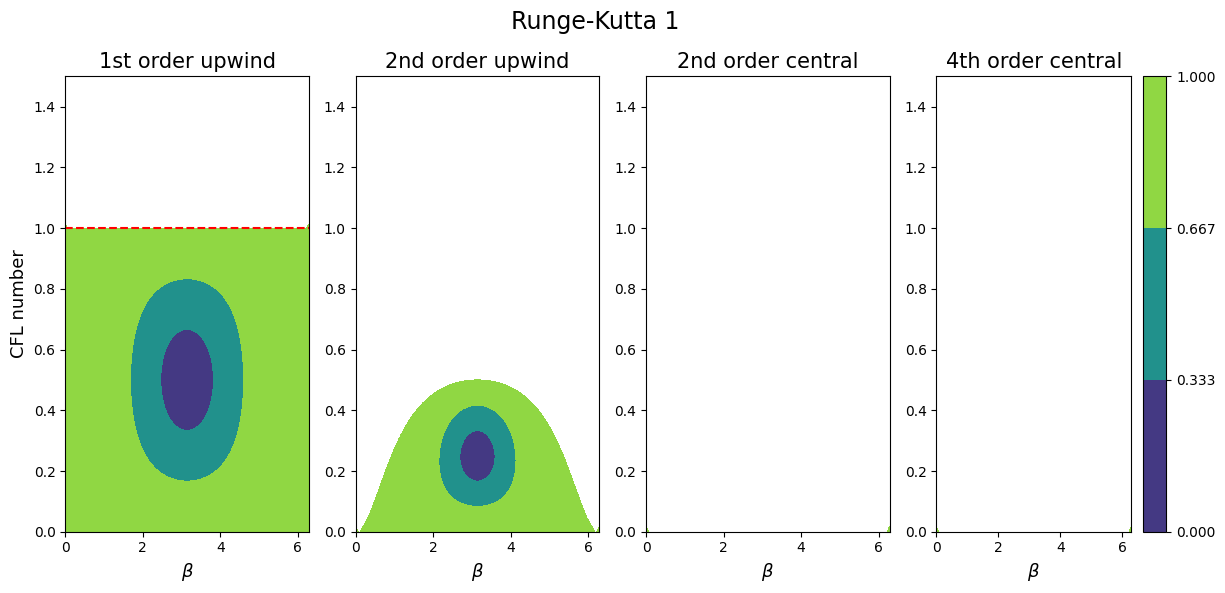

In [65]:
spacial_funcs = [mu_upwind_1, mu_upwind_2, mu_central_2, mu_central_4]

C = np.linspace(0, 1.5, 90)
beta = np.linspace(0, 2*np.pi, 100)

X, Y = np.meshgrid(C, beta)

i = 0

values = g_rk_1(mu_upwind_1(X, Y))


fig, ax = plt.subplots(ncols=len(spacial_funcs), figsize=(12,6))

fig.suptitle('Runge-Kutta 1', fontsize=17)

for s_func in spacial_funcs:
    contour = ax[i].contourf(Y, X, g_rk_1(s_func(X, Y)), levels=np.linspace(0,1,4), cmap="viridis",vmax=1)
    ax[i].set_xlabel(r"$\beta$", fontsize=13)
    title = s_func.__name__.split("mu_")[1]
    words = title.split("_")
    words[0] = words[0].upper()
    title = labels[i]
    ax[i].set_title(title, fontsize=15)
    i+=1

ax[0].set_ylabel( "CFL number", fontsize=13)
ax[0].axhline(1, color='r', linestyle='--')

fig.tight_layout()
fig.colorbar(contour, ax=ax[-1])
plt.savefig("plots_for_thesis/vn_rk1.png", bbox_inches='tight')

In [43]:
def find_max_y_index(matrix):
    # Iterate over the rows in reverse order (from last to first)
    for y in range(matrix.shape[0] - 1, -1, -1):
        # Check if all values in the row are less than or equal to 1
        if np.all(matrix[y, :] <= 1):
            return y
    # If no such row is found, return None or an appropriate value
    return None

find_max_y_index(values)

99

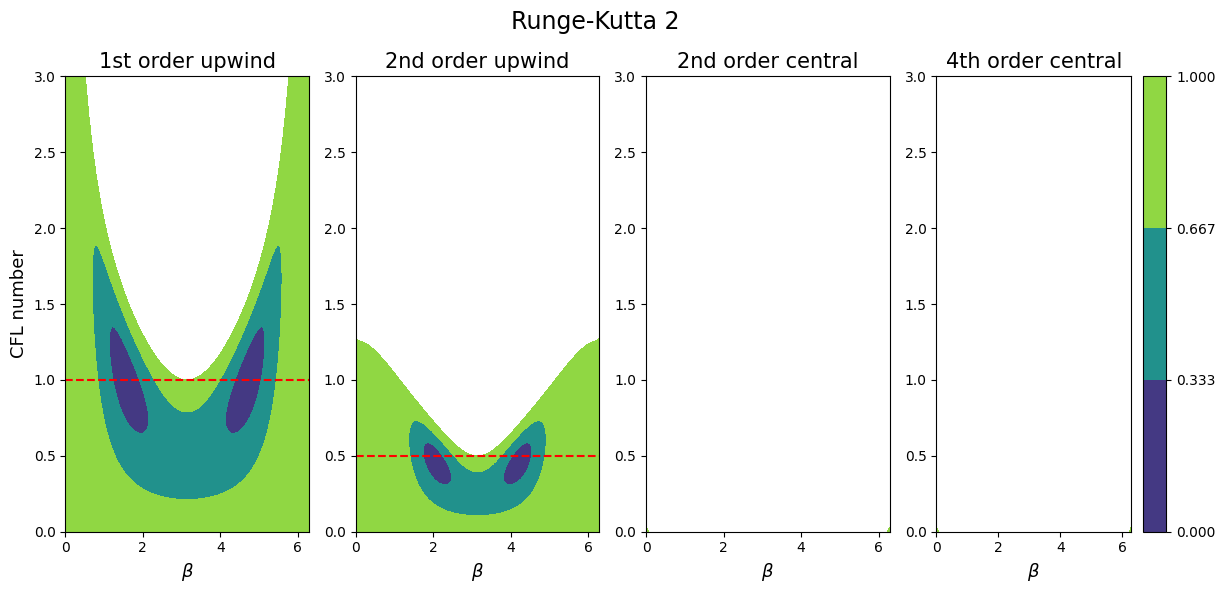

In [66]:
fig, ax = plt.subplots(ncols=len(spacial_funcs), figsize=(12,6))

fig.suptitle('Runge-Kutta 2', fontsize=17)

C = np.linspace(0, 3, 100)
beta = np.linspace(0, 2*np.pi, 100)

X, Y = np.meshgrid(C, beta)

i = 0

ax[0].set_ylabel( "CFL number", fontsize=13)

for s_func in spacial_funcs:
    contour = ax[i].contourf(Y, X, g_rk_2(s_func(X, Y)), levels=np.linspace(0,1,4), cmap="viridis",vmax=1)
    ax[i].set_xlabel(r"$\beta$", fontsize=13)
    title = s_func.__name__.split("mu_")[1]
    words = title.split("_")
    words[0] = words[0].upper()
    title = labels[i]
    ax[i].set_title(title, fontsize=15)
    i+=1

ax[0].axhline(1, color='r', linestyle='--')
ax[1].axhline(0.5, color='r', linestyle='--')
#ax[1].set_ylim(0.499, 0.501)
fig.tight_layout()
fig.colorbar(contour, ax=ax[-1])
plt.savefig("plots_for_thesis/vn_rk2.png", bbox_inches='tight')

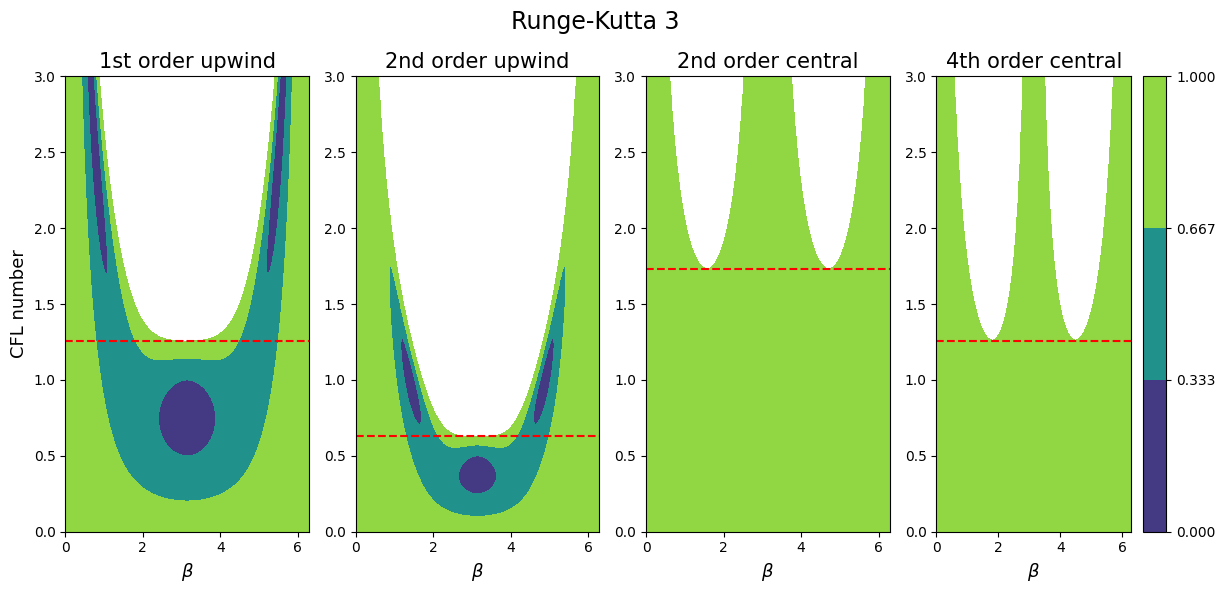

In [64]:
fig, ax = plt.subplots(ncols=len(spacial_funcs), figsize=(12,6))

fig.suptitle('Runge-Kutta 3', fontsize=17)

C = np.linspace(0, 3, 100)
beta = np.linspace(0, 2*np.pi, 100)

X, Y = np.meshgrid(C, beta)

i = 0

ax[0].set_ylabel( "CFL number", fontsize=13)

for s_func in spacial_funcs:
    contour = ax[i].contourf(Y, X, g_rk_3(s_func(X, Y)), levels=np.linspace(0,1,4), cmap="viridis",vmax=1)
    ax[i].set_xlabel(r"$\beta$", fontsize=13)
    title = s_func.__name__.split("mu_")[1]
    words = title.split("_")
    words[0] = words[0].upper()
    title = labels[i]
    ax[i].set_title(title, fontsize=15)
    i+=1

ax[0].axhline(2/5*np.pi, color='r', linestyle='--')
#ax[0].set_ylim(1.24, 1.26)
ax[1].axhline(1/5*np.pi, color='r', linestyle='--')
#ax[1].set_ylim(1/5*np.pi-0.01, 1/5*np.pi+0.01)
ax[2].axhline(11/20*np.pi, color='r', linestyle='--')
#ax[2].set_ylim(1.72, 1.74)
ax[3].axhline(2/5*np.pi, color='r', linestyle='--')

fig.tight_layout()
fig.colorbar(contour, ax=ax[-1])
plt.savefig("plots_for_thesis/vn_rk3.png", bbox_inches='tight')

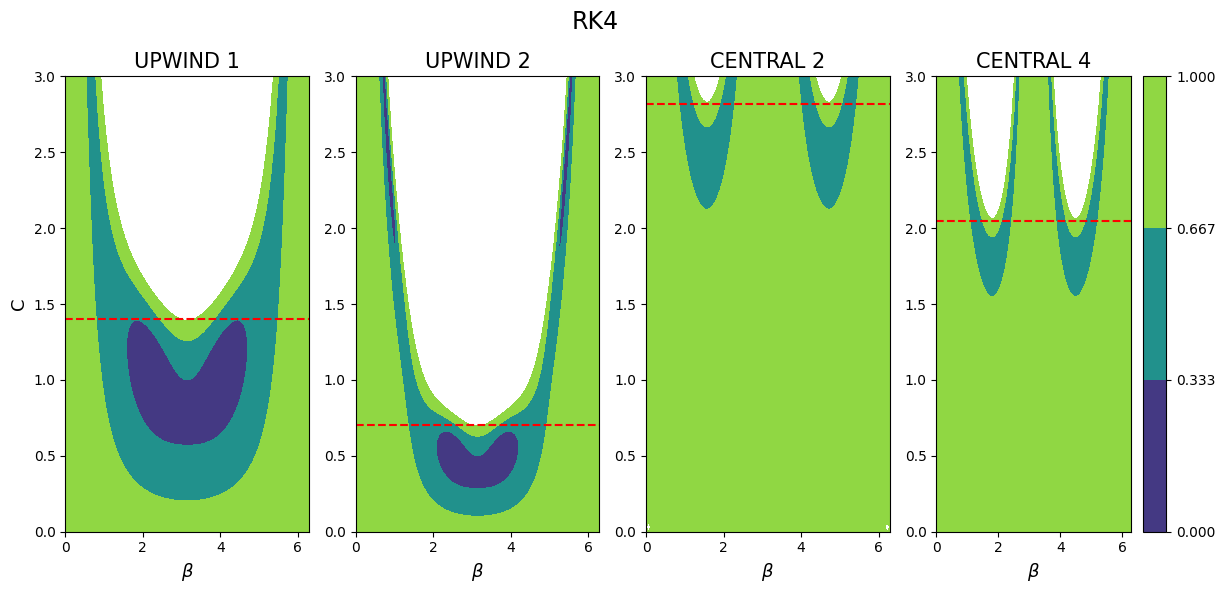

In [17]:
fig, ax = plt.subplots(ncols=len(spacial_funcs), figsize=(12,6))

fig.suptitle('RK4', fontsize=17)

C = np.linspace(0, 3, 100)
beta = np.linspace(0, 2*np.pi, 100)

X, Y = np.meshgrid(C, beta)

i = 0

ax[0].set_ylabel( "C", fontsize=13)

for s_func in spacial_funcs:
    contour = ax[i].contourf(Y, X, g_rk_4(s_func(X, Y)), levels=np.linspace(0,1,4), cmap="viridis",vmax=1)
    ax[i].set_xlabel(r"$\beta$", fontsize=13)
    title = s_func.__name__.split("mu_")[1]
    words = title.split("_")
    words[0] = words[0].upper()
    title = ' '.join(words)
    ax[i].set_title(title, fontsize=15)
    i+=1

ax[0].axhline(1.4, color='r', linestyle='--')
ax[1].axhline(0.70, color='r', linestyle='--')
ax[2].axhline(2.82, color='r', linestyle='--')
ax[3].axhline(2.05, color='r', linestyle='--')
fig.tight_layout()
fig.colorbar(contour, ax=ax[-1])
#plt.savefig("../thesis/mastermal-ita/von_neumann_figs//vn_rk4.pdf", bbox_inches='tight')